<a href="https://colab.research.google.com/github/athu-lya/Assignment1/blob/main/Assignment_on__preprocessing_ATHULYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment on preprocessing**

Do the following on titanic dataset
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [33]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [34]:
#1. Loading the data
data=pd.read_csv('/content/titanic_dataset (1).csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
#2.Make ‘PassengerId’ as the index column
data.set_index('PassengerId',inplace=True)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [36]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
#3.Check the basic details of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [39]:
#3
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [41]:
#4.Fill in all the missing values present in all the columns in the dataset
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [42]:
data.Age.skew()

0.38910778230082704

<Axes: >

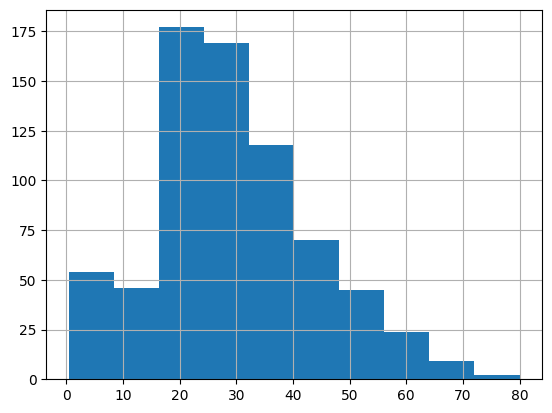

In [43]:
data.Age.hist()

In [44]:
data.Age.fillna(data.Age.median(), inplace=True)
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [45]:
data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [46]:
data.Cabin.isna().sum()

687

More than 50% of the values are na, so that dropping the cabin column

In [47]:
data.drop('Cabin', axis=1, inplace=True)

In [48]:
data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [49]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [50]:
data.Embarked[data.Embarked.isna()]

PassengerId
62     NaN
830    NaN
Name: Embarked, dtype: object

In [51]:
data.Embarked.iloc[60:64]

PassengerId
61      C
62    NaN
63      S
64      S
Name: Embarked, dtype: object

In [52]:
data.Embarked.iloc[829:833]

PassengerId
830    NaN
831      C
832      S
833      C
Name: Embarked, dtype: object

In [53]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [54]:
#5.Check and handle outliers in at least 3 columns in the dataset
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
#dropping the name and Ticket column
data.drop(['Name','Ticket'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


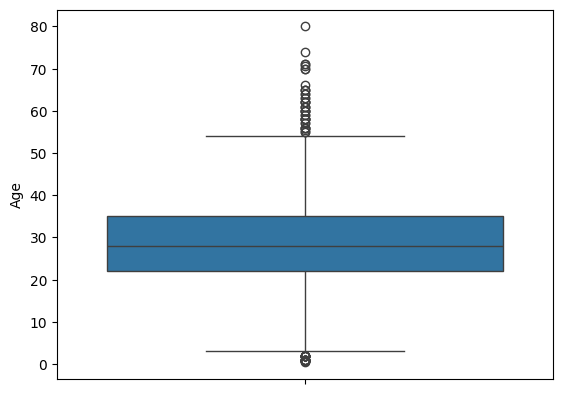

In [56]:
sns.boxplot(data.Age);

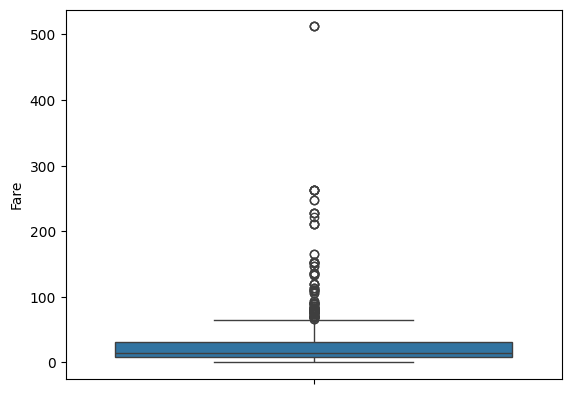

In [57]:
sns.boxplot(data.Fare);

In [58]:
# finding the quartiles of Fare
Q1 = data.Fare.quantile(0.25)
Q3 = data.Fare.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")
print(f"Lower : {lower}")
print(f"Upper : {upper}")


Q1 : 7.9104
Q3 : 31.0
IQR : 23.0896
Lower : -26.724
Upper : 65.6344


In [59]:
data[(data.Fare < lower) | (data.Fare < upper)].index

Int64Index([  1,   3,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            882, 883, 884, 885, 886, 887, 888, 889, 890, 891],
           dtype='int64', name='PassengerId', length=775)

<Axes: >

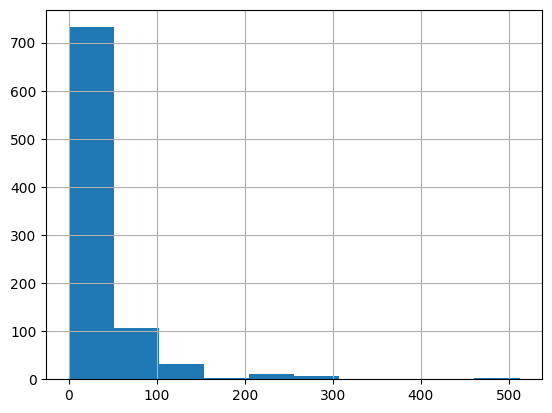

In [60]:
data.Fare.hist()

In [61]:
data.Age.value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

<Axes: ylabel='Age'>

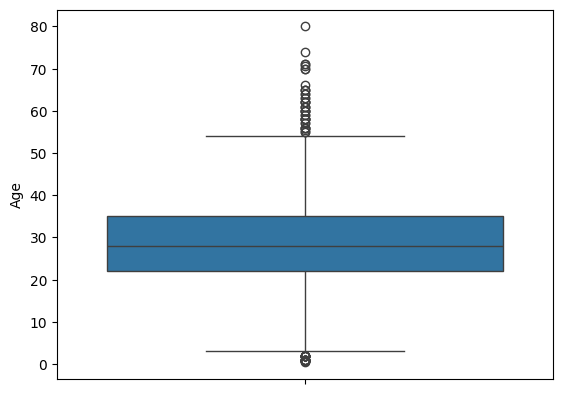

In [62]:
sns.boxplot(data.Age)


In [63]:
# Handling outliers in Age column using  z-score
from scipy.stats import zscore
z_scores = zscore(data.Age)
print(z_scores)

PassengerId
1     -0.565736
2      0.663861
3     -0.258337
4      0.433312
5      0.433312
         ...   
887   -0.181487
888   -0.796286
889   -0.104637
890   -0.258337
891    0.202762
Name: Age, Length: 891, dtype: float64


<Axes: xlabel='Age', ylabel='Count'>

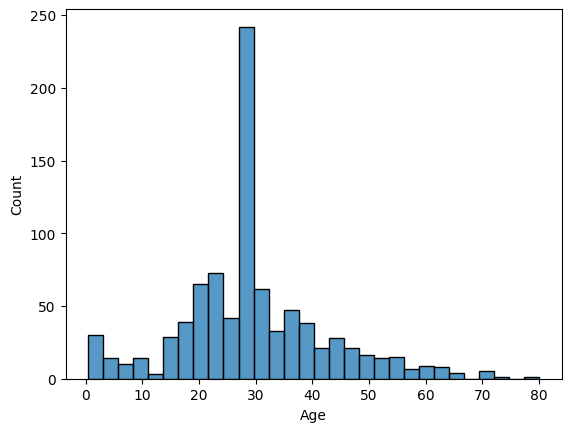

In [64]:
sns.histplot(data.Age)

In [65]:
threshold = 2
outlier_index = data.Age.index[(z_scores > threshold) | (z_scores < -threshold)]
outlier_index

Int64Index([  8,  12,  17,  34,  44,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 194, 196, 206, 233, 253, 262, 269, 276, 281,
            298, 306, 327, 341, 349, 367, 375, 382, 387, 408, 439, 457, 468,
            470, 480, 484, 488, 494, 531, 546, 556, 571, 588, 626, 627, 631,
            643, 645, 648, 660, 673, 685, 695, 746, 756, 773, 789, 804, 825,
            828, 830, 832, 852, 880],
           dtype='int64', name='PassengerId')

In [66]:
len(outlier_index)

70

<Axes: ylabel='Age'>

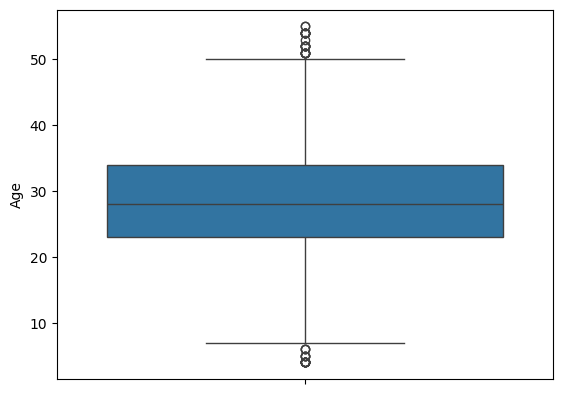

In [67]:
test_df = data.drop(outlier_index, axis=0)
sns.boxplot(test_df.Age)

In [68]:
# finding the quartiles of Fare
Q1 = data.Age.quantile(0.25)
Q3 = data.Age.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - (1.5 * IQR)
upper = Q3 + (1.5 * IQR)
print(f"Q1 : {Q1}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")
print(f"Lower : {lower}")
print(f"Upper : {upper}")

Q1 : 22.0
Q3 : 35.0
IQR : 13.0
Lower : 2.5
Upper : 54.5


<Axes: ylabel='Age'>

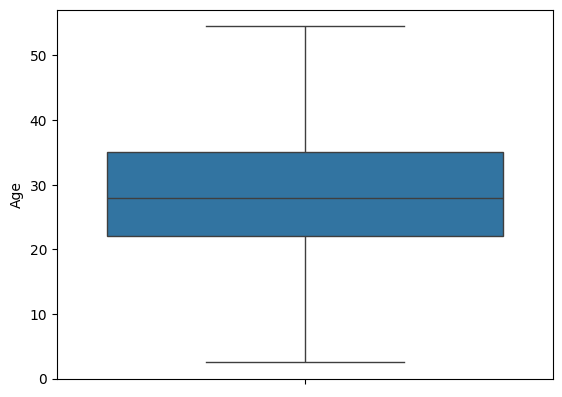

In [69]:
data.Age.clip(lower=lower, upper=upper,inplace=True)
sns.boxplot(data.Age)

In [70]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [71]:
data.Sex.unique()

array(['male', 'female'], dtype=object)

In [73]:
data.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [74]:
data.Pclass.unique()

array([3, 1, 2])

In [75]:
data.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6])

In [76]:
data.Survived.unique()

array([0, 1])

In [77]:
#5.Do min max scaling on the feature set (Take ‘Survived’ as target)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data.Sex)
data['Embarked'] = label_encoder.fit_transform(data.Embarked)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2
2,1,1,0,38.0,1,0,71.2833,0
3,1,3,0,26.0,0,0,7.9250,2
4,1,1,0,35.0,1,0,53.1000,2
5,0,3,1,35.0,0,0,8.0500,2


In [78]:
X = data.drop('Survived', axis=1)
Y = data['Survived']

In [79]:
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.375000,0.125,0.0,0.014151,1.0
1,0.0,0.0,0.682692,0.125,0.0,0.139136,0.0
2,1.0,0.0,0.451923,0.000,0.0,0.015469,1.0
3,0.0,0.0,0.625000,0.125,0.0,0.103644,1.0
4,1.0,1.0,0.625000,0.000,0.0,0.015713,1.0
